In [2]:
import numpy
import torch
import torch.utils.data
import torch.optim
import matplotlib.pyplot as pyplot
import PIL.Image
import skimage

import models

# Load Model

In [3]:
unet = models.UNet(n_classes=10)
unet.load_state_dict(torch.load("outputs/unet_state.pt")["model_state_dict"])

<All keys matched successfully>

# Load Example Image

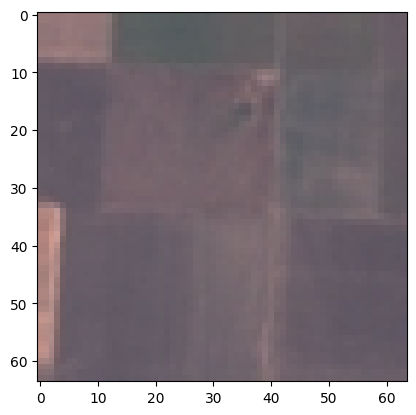

In [9]:
img = PIL.Image.open("dataset/AnnualCrop_1.jpg")
size = img.size
pyplot.imshow(img)

# Prediction

In [14]:
data = numpy.array(img.getdata()).reshape((size[0], size[1], 3)) / 255
inputs = torch.Tensor(data.transpose((2, 0, 1)).reshape((1, 3, 64, 64)))
y = unet(inputs)
pred = y.detach().numpy()[0]

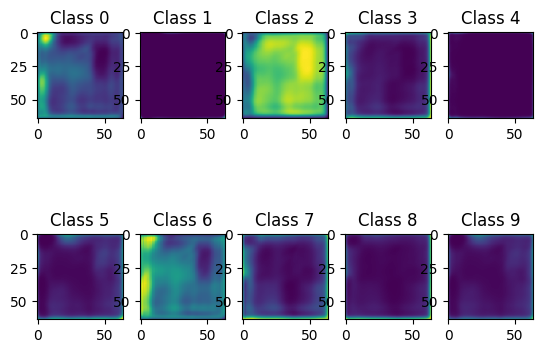

In [30]:
for i in range(10):
    pyplot.subplot(2, 5, i+1)  # 2 rows, 5 columns, i+1 is the index of the subplot
    segmented = pred[i]
    pyplot.imshow(segmented)
    pyplot.title(f"Class {i}")  # Add title for each subplot

pyplot.show()

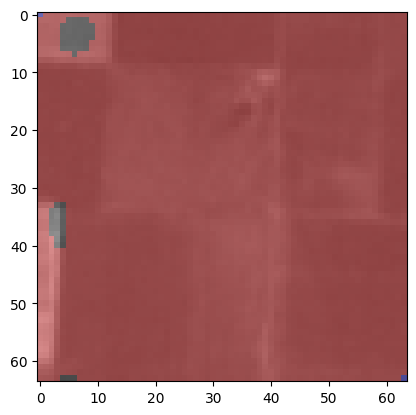

In [31]:
segmented = numpy.argmax(pred, axis=0)
pyplot.imshow(skimage.color.label2rgb(segmented, data))